# Automating Crypto Website(Coinmarketcap) API Pull using Python

In [43]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

In [2]:
url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
#Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'50',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
}

In [3]:
session = Session()
session.headers.update(headers)

In [4]:
try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  #print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
 print(f"Response Status Code: {response.status_code}")
print(f"Response Content: {response.text}")

Response Content: {"status":{"timestamp":"2024-06-02T03:03:55.219Z","error_code":0,"error_message":null,"elapsed":20,"credit_count":1,"notice":null,"total_count":10050},"data":[{"id":1,"name":"Bitcoin","symbol":"BTC","slug":"bitcoin","num_market_pairs":11096,"date_added":"2010-07-13T00:00:00.000Z","tags":["mineable","pow","sha-256","store-of-value","state-channel","coinbase-ventures-portfolio","three-arrows-capital-portfolio","polychain-capital-portfolio","binance-labs-portfolio","blockchain-capital-portfolio","boostvc-portfolio","cms-holdings-portfolio","dcg-portfolio","dragonfly-capital-portfolio","electric-capital-portfolio","fabric-ventures-portfolio","framework-ventures-portfolio","galaxy-digital-portfolio","huobi-capital-portfolio","alameda-research-portfolio","a16z-portfolio","1confirmation-portfolio","winklevoss-capital-portfolio","usv-portfolio","placeholder-ventures-portfolio","pantera-capital-portfolio","multicoin-capital-portfolio","paradigm-portfolio","bitcoin-ecosystem","

In [5]:
type(data)

dict

In [11]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [7]:
df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')

In [8]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11096,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.970665e+07,1.970665e+07,False,NaN,1,NaN,NaN,NaN,2024-06-02T03:02:00.000Z,67703.795820,1.140378e+10,-57.6512,0.013436,0.087808,-1.777928,13.665912,2.774243,6.414294,1.334215e+12,52.6981,1.421780e+12,NaN,2024-06-02T03:02:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-01 23:05:09.364416
1,1027,Ethereum,ETH,ethereum,9020,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.201440e+08,1.201440e+08,True,NaN,2,NaN,NaN,NaN,2024-06-02T03:01:00.000Z,3802.242273,9.007928e+09,-40.8847,-0.491123,0.757431,1.682839,26.235380,14.980075,9.073052,4.568164e+11,18.0478,4.568164e+11,NaN,2024-06-02T03:01:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-01 23:05:09.364416
2,825,Tether USDt,USDT,tether,87499,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,1.122100e+11,1.150866e+11,True,NaN,3,NaN,NaN,NaN,2024-06-02T03:01:00.000Z,0.999234,3.491986e+10,-39.8156,0.005081,0.013995,-0.083017,-0.105955,-0.100009,-0.126282,1.121240e+11,4.4298,1.149984e+11,NaN,2024-06-02T03:01:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-06-01 23:05:09.364416
3,1839,BNB,BNB,bnb,2173,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.475852e+08,1.475852e+08,False,NaN,4,NaN,NaN,NaN,2024-06-02T03:01:00.000Z,602.904417,1.582585e+09,-0.5711,-0.261721,1.390013,0.263836,6.707505,8.122415,45.379943,8.897980e+10,3.5154,8.897980e+10,NaN,2024-06-02T03:01:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-01 23:05:09.364416
4,5426,Solana,SOL,solana,669,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.596929e+08,5.772541e+08,True,NaN,5,NaN,NaN,NaN,2024-06-02T03:01:00.000Z,165.667499,1.049440e+09,-55.8068,-0.433147,-1.046407,-0.107017,18.497456,-10.815450,27.254902,7.615618e+10,3.0088,9.563225e+10,NaN,2024-06-02T03:01:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-01 23:05:09.364416
5,3408,USDC,USDC,usd-coin,19523,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,3.239048e+10,3.239048e+10,False,NaN,6,NaN,NaN,NaN,2024-06-02T03:01:00.000Z,1.000063,2.547071e+09,-58.3463,0.008060,-0.010419,0.004488,-0.011893,0.005597,0.019296,3.239251e+10,1.2798,3.239251e+10,NaN,2024-06-02T03:01:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-06-01 23:05:09.364416
6,52,XRP,XRP,xrp,1334,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.545036e+10,9.998757e+10,False,NaN,7,NaN,NaN,NaN,2024-06-02T03:02:00.000Z,0.518400,5.555842e+08,-52.9589,-0.094892,-0.094782,-3.916787,-0.413108,-11.271201,-18.277601,2.874547e+10,1.1354,5.184000e+10,NaN,2024-06-02T03:02:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-01 23:05:09.364416
7,74,Dogecoin,DOGE,dogecoin,975,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.445373e+11,1.445373e+11,True,NaN,8,NaN,NaN,NaN,2024-06-02T03:02:00.000Z,0.159643,4.959246e+08,-46.1606,-0.656768,0.249497,-6.182492,19.186733,-13.886064,1.601645,2.307433e+10,0.9112,2.307433e+10,NaN,2024-06-02T03:02:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-01 23:05:09.364416
8,2010,Cardano,ADA,cardano,1189,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.570209e+10,3

In [9]:
import pandas as pd
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json
from time import sleep

def api_runner():
    global df

    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
    # Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
        'start': '1',
        'limit': '50',
        'convert': 'USD'
    }
    headers = {
        'Accepts': 'application/json',
        'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
    }

    session = Session()
    session.headers.update(headers)

    try:
        response = session.get(url, params=parameters)
        data = json.loads(response.text)
        # print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
        print(f"Response Status Code: {response.status_code}")
        print(f"Response Content: {response.text}")

    df2 = pd.json_normalize(data['data'])
    df2['timestamp'] = pd.to_datetime('now')
    df_append = pd.DataFrame(df2)
    df = pd.concat([df, df_append])

# Initialize an empty DataFrame
df = pd.DataFrame()

# Run the API runner 333 times
for i in range(333):
    api_runner()
    print('API Runner Completed!')
    sleep(60)  # Sleep for a minute

# Exit the script
exit()


API Runner Completed!
API Runner Completed!
API Runner Completed!
API Runner Completed!
API Runner Completed!


KeyboardInterrupt: 

In [12]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11096,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.970665e+07,1.970665e+07,False,NaN,1,NaN,NaN,NaN,2024-06-02T03:05:00.000Z,67712.574761,1.140414e+10,-57.6787,0.036866,0.072497,-1.728197,13.351100,2.869673,6.465446,1.334388e+12,52.6730,1.421964e+12,NaN,2024-06-02T03:05:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-01 23:07:03.548300
1,1027,Ethereum,ETH,ethereum,9020,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.201440e+08,1.201440e+08,True,NaN,2,NaN,NaN,NaN,2024-06-02T03:04:00.000Z,3802.516245,9.021888e+09,-40.7360,-0.437550,0.709238,1.698664,26.006226,15.193308,9.163141,4.568493e+11,18.0403,4.568493e+11,NaN,2024-06-02T03:04:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-01 23:07:03.548300
2,825,Tether USDt,USDT,tether,87499,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,1.122100e+11,1.150866e+11,True,NaN,3,NaN,NaN,NaN,2024-06-02T03:04:00.000Z,0.999188,3.492556e+10,-39.7720,-0.011674,0.008520,-0.090727,-0.098521,-0.113008,-0.151472,1.121189e+11,4.4274,1.149931e+11,NaN,2024-06-02T03:04:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-06-01 23:07:03.548300
3,1839,BNB,BNB,bnb,2173,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.475852e+08,1.475852e+08,False,NaN,4,NaN,NaN,NaN,2024-06-02T03:04:00.000Z,602.815394,1.583250e+09,-0.5784,-0.339897,1.341587,0.201415,6.631141,8.295236,45.462773,8.896666e+10,3.5132,8.896666e+10,NaN,2024-06-02T03:04:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-01 23:07:03.548300
4,5426,Solana,SOL,solana,669,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.596929e+08,5.772541e+08,True,NaN,5,NaN,NaN,NaN,2024-06-02T03:04:00.000Z,165.724254,1.043778e+09,-55.9933,-0.326890,-1.112808,-0.105841,18.294147,-10.593474,27.576157,7.618227e+10,3.0083,9.566501e+10,NaN,2024-06-02T03:04:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-01 23:07:03.548300
5,3408,USDC,USDC,usd-coin,19523,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,3.239048e+10,3.239048e+10,False,NaN,6,NaN,NaN,NaN,2024-06-02T03:04:00.000Z,1.000065,2.548099e+09,-58.3445,-0.004534,-0.005551,0.003194,-0.001151,0.014237,0.010938,3.239259e+10,1.2791,3.239259e+10,NaN,2024-06-02T03:04:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-06-01 23:07:03.548300
6,52,XRP,XRP,xrp,1334,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.545036e+10,9.998757e+10,False,NaN,7,NaN,NaN,NaN,2024-06-02T03:05:00.000Z,0.518289,5.556494e+08,-52.9614,-0.108417,-0.146263,-3.941379,-0.454267,-11.190167,-18.283889,2.873931e+10,1.1344,5.182890e+10,NaN,2024-06-02T03:05:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-01 23:07:03.548300
7,74,Dogecoin,DOGE,dogecoin,975,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.445373e+11,1.445373e+11,True,NaN,8,NaN,NaN,NaN,2024-06-02T03:05:00.000Z,0.159587,4.950611e+08,-46.2973,-0.598869,0.100477,-6.184133,18.964822,-13.616103,2.090948,2.306626e+10,0.9109,2.306626e+10,NaN,2024-06-02T03:05:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-01 23:07:03.548300
8,2010,Cardano,ADA,cardano,1189,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.570209e+10

In [13]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [14]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11096,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19706653.00000,19706653.00000,False,NaN,1,NaN,NaN,NaN,2024-06-02T03:05:00.000Z,67712.57476,11404139987.12110,-57.67870,0.03687,0.07250,-1.72820,13.35110,2.86967,6.46545,1334388214547.06616,52.67300,1421964069976.17993,NaN,2024-06-02T03:05:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-01 23:07:03.548300
1,1027,Ethereum,ETH,ethereum,9020,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120143951.28703,120143951.28703,True,NaN,2,NaN,NaN,NaN,2024-06-02T03:04:00.000Z,3802.51625,9021888194.11312,-40.73600,-0.43755,0.70924,1.69866,26.00623,15.19331,9.16314,456849326544.10107,18.04030,456849326544.09998,NaN,2024-06-02T03:04:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-01 23:07:03.548300
2,825,Tether USDt,USDT,tether,87499,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,112210010734.72754,115086550406.94913,True,NaN,3,NaN,NaN,NaN,2024-06-02T03:04:00.000Z,0.99919,34925561770.80246,-39.77200,-0.01167,0.00852,-0.09073,-0.09852,-0.11301,-0.15147,112118878919.36780,4.42740,114993082398.23000,NaN,2024-06-02T03:04:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-06-01 23:07:03.548300
3,1839,BNB,BNB,bnb,2173,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,147585249.24190,147585249.24190,False,NaN,4,NaN,NaN,NaN,2024-06-02T03:04:00.000Z,602.81539,1583249672.58503,-0.57840,-0.33990,1.34159,0.20141,6.63114,8.29524,45.46277,88966660097.00946,3.51320,88966660097.00999,NaN,2024-06-02T03:04:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-01 23:07:03.548300
4,5426,Solana,SOL,solana,669,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,459692939.13543,577254141.59225,True,NaN,5,NaN,NaN,NaN,2024-06-02T03:04:00.000Z,165.72425,1043777618.23941,-55.99330,-0.32689,-1.11281,-0.10584,18.29415,-10.59347,27.57616,76182269395.29056,3.00830,95665011968.72000,NaN,2024-06-02T03:04:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-01 23:07:03.548300
5,3408,USDC,USDC,usd-coin,19523,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,32390481887.05911,32390481887.05911,False,NaN,6,NaN,NaN,NaN,2024-06-02T03:04:00.000Z,1.00007,2548098945.05444,-58.34450,-0.00453,-0.00555,0.00319,-0.00115,0.01424,0.01094,32392594236.70419,1.27910,32392594236.70000,NaN,2024-06-02T03:04:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-06-01 23:07:03.548300
6,52,XRP,XRP,xrp,1334,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,55450358947.00000,99987572899.00000,False,NaN,7,NaN,NaN,NaN,2024-06-02T03:05:00.000Z,0.51829,555649401.03381,-52.96140,-0.10842,-0.14626,-3.94138,-0.45427,-11.19017,-18.28389,28739309117.57398,1.13440,51828896446.00000,NaN,2024-06-02T03:05:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-01 23:07:03.548300
7,74,Dogecoin,DOGE,dogecoin,975,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,144537296383.70523,144537296383.70523,True,NaN,8,NaN,NaN,NaN,2024-06-02T03:05:00.000Z,0.15959,495061070.17674,-46.29730,-0.59887,0.10048,-6.18413,18.96482,-13.61610,2.09095,23066262577.02736,0.91090,23066262577.03000,NaN,2024-06-02T03:05:00.000Z,NaN,NaN,NaN,NaN,NaN

In [16]:
df3 = df.groupby('name', sort = False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']] . mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,0.03533,0.08009,-1.71343,13.31396,2.88303,6.45019
Ethereum,-0.36282,0.75817,1.80708,26.05511,15.29650,9.26199
Tether USDt,-0.00383,0.01376,-0.07903,-0.09644,-0.11188,-0.13408
BNB,-0.25426,1.41462,0.28725,6.64341,8.36820,45.46114
Solana,-0.24753,-1.01612,-0.01210,18.28525,-10.43520,27.73803
USDC,-0.00332,-0.00530,0.00296,-0.00900,0.00132,0.01496
XRP,-0.08302,-0.11810,-3.89470,-0.49227,-11.11859,-18.47266
Dogecoin,-0.46839,0.22128,-6.01990,18.98022,-13.38835,2.04176
Cardano,-0.04472,0.95986,-1.83051,-2.18665,-22.57614,-39.76217


In [18]:
df4 = df3.stack()
df4

name                                           
Bitcoin            quote.USD.percent_change_1h      0.03533
                   quote.USD.percent_change_24h     0.08009
                   quote.USD.percent_change_7d     -1.71343
                   quote.USD.percent_change_30d    13.31396
                   quote.USD.percent_change_60d     2.88303
                   quote.USD.percent_change_90d     6.45019
Ethereum           quote.USD.percent_change_1h     -0.36282
                   quote.USD.percent_change_24h     0.75817
                   quote.USD.percent_change_7d      1.80708
                   quote.USD.percent_change_30d    26.05511
                   quote.USD.percent_change_60d    15.29650
                   quote.USD.percent_change_90d     9.26199
Tether USDt        quote.USD.percent_change_1h     -0.00383
                   quote.USD.percent_change_24h     0.01376
                   quote.USD.percent_change_7d     -0.07903
                   quote.USD.percent_change_30d    -

In [19]:
type(df4)

pandas.core.series.Series

In [20]:
df5 = df4.to_frame(name = 'values')

In [21]:
df5

values
name                                                    
Bitcoin           quote.USD.percent_change_1h    0.03533
                  quote.USD.percent_change_24h   0.08009
                  quote.USD.percent_change_7d   -1.71343
                  quote.USD.percent_change_30d  13.31396
                  quote.USD.percent_change_60d   2.88303
                  quote.USD.percent_change_90d   6.45019
Ethereum          quote.USD.percent_change_1h   -0.36282
                  quote.USD.percent_change_24h   0.75817
                  quote.USD.percent_change_7d    1.80708
                  quote.USD.percent_change_30d  26.05511
                  quote.USD.percent_change_60d  15.29650
                  quote.USD.percent_change_90d   9.26199
Tether USDt       quote.USD.percent_change_1h   -0.00383
                  quote.USD.percent_change_24h   0.01376
                  quote.USD.percent_change_7d   -0.07903
                  quote.USD.percent_change_30d  -0.09644
                  quote.USD.percent_change_60d  -0.11188
                  quote.USD.percent_change_90d  -0.13408
BNB               quote.USD.percent_change_1h   -0.25426
                  quote.USD.percent_change_24h   1.41462
                  quote.USD.percent_change_7d    0.28725
                  quote.USD.percent_change_30d   6.64341
                  quote.USD.percent_change_60d   8.36820
                  quote.USD.percent_change_90d  45.46114
Solana            quote.USD.percent_change_1h   -0.24753
                  quote.USD.percent_change_24h  -1.01612
                  quote.USD.percent_change_7d   -0.01210
                  quote.USD.percent_change_30d  18.28525
                  quote.USD.percent_change_60d -10.43520
                  quote.USD.percent_change_90d  27.73803
USDC              quote.USD.percent_change_1h   -0.00332
                  quote.USD.percent_change_24h  -0.00530
                  quote.USD.percent_change_7d    0.00296
                  quote.USD.percent_change_30d  -0.00900
                  quote.USD.percent_change_60d   0.00132
                  quote.USD.percent_change_90d   0.01496
XRP               quote.USD.percent_change_1h   -0.08302
                  quote.USD.percent_change_24h  -0.11810
                  quote.USD.percent_change_7d   -3.89470
                  quote.USD.percent_change_30d  -0.49227
                  quote.USD.percent_change_60d -11.11859
                  quote.USD.percent_change_90d -18.47266
Dogecoin          quote.USD.percent_change_1h   -0.46839
                  quote.USD.percent_change_24h   0.22128
                  quote.USD.percent_change_7d   -6.01990
                  quote.USD.percent_change_30d  18.98022
                  quote.USD.percent_change_60d -13.38835
                  quote.USD.percent_change_90d   2.04176
Cardano           quote.USD.percent_change_1h   -0.04472
                  quote.USD.percent_change_24h   0.95986
                  quote.USD.percent_change_7d   -1.83051
                  quote.USD.percent_change_30d  -2.18665
                  quote.USD.percent_change_60d -22.57614
                  quote.USD.percent_change_90d -39.76217
Toncoin           quote.USD.percent_change_1h   -0.01373
                  quote.USD.percent_change_24h  -0.15658
                  quote.USD.percent_change_7d   -1.68026
                  quote.USD.percent_change_30d  18.82056
                  quote.USD.percent_change_60d  27.07564
                  quote.USD.percent_change_90d 136.40831
Shiba Inu         quote.USD.percent_change_1h   -1.06248
                  quote.USD.percent_change_24h  -1.56510
                  quote.USD.percent_change_7d    1.09513
                  quote.USD.percent_change_30d   7.58940
                  quote.USD.percent_change_60d  -6.78322
                  quote.USD.percent_change_90d  10.72678
Avalanche         quote.USD.percent_change_1h   -0.22460
                  quote.USD.percent_change_24h  -0.63859
                  quote.USD.percent_change_7d   -5.14392
   

In [22]:
df5.count()

values    300
dtype: int64

In [26]:
index = pd.Index(range(300)) 
df6 = df5.reset_index()


In [27]:
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,0.03533
1,Bitcoin,quote.USD.percent_change_24h,0.08009
2,Bitcoin,quote.USD.percent_change_7d,-1.71343
3,Bitcoin,quote.USD.percent_change_30d,13.31396
4,Bitcoin,quote.USD.percent_change_60d,2.88303
5,Bitcoin,quote.USD.percent_change_90d,6.45019
6,Ethereum,quote.USD.percent_change_1h,-0.36282
7,Ethereum,quote.USD.percent_change_24h,0.75817
8,Ethereum,quote.USD.percent_change_7d,1.80708
9,Ethereum,quote.USD.percent_change_30d,26.05511


In [29]:
df7 = df6.rename(columns = {'level_1':'percent_change'})

In [30]:
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,0.03533
1,Bitcoin,quote.USD.percent_change_24h,0.08009
2,Bitcoin,quote.USD.percent_change_7d,-1.71343
3,Bitcoin,quote.USD.percent_change_30d,13.31396
4,Bitcoin,quote.USD.percent_change_60d,2.88303
5,Bitcoin,quote.USD.percent_change_90d,6.45019
6,Ethereum,quote.USD.percent_change_1h,-0.36282
7,Ethereum,quote.USD.percent_change_24h,0.75817
8,Ethereum,quote.USD.percent_change_7d,1.80708
9,Ethereum,quote.USD.percent_change_30d,26.05511


In [35]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h','24h','7d','30d','60d','90d'])
df7

,name,percent_change,values
0,Bitcoin,1h,0.03533
1,Bitcoin,24h,0.08009
2,Bitcoin,7d,-1.71343
3,Bitcoin,30d,13.31396
4,Bitcoin,60d,2.88303
5,Bitcoin,90d,6.45019
6,Ethereum,1h,-0.36282
7,Ethereum,24h,0.75817
8,Ethereum,7d,1.80708
9,Ethereum,30d,26.05511


In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

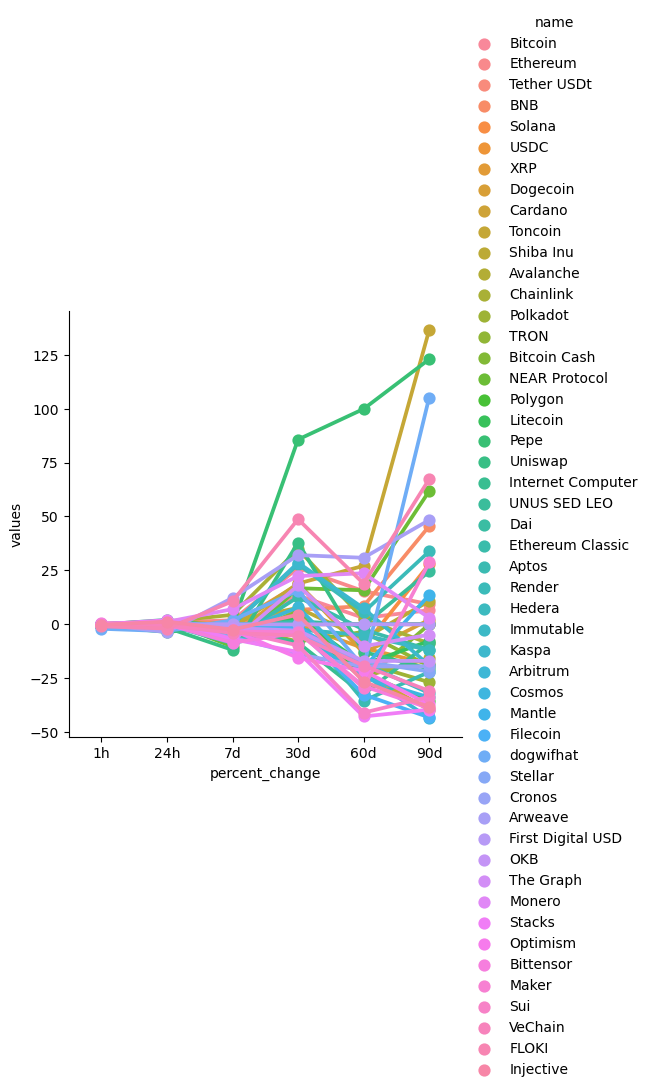

In [36]:
sns.catplot(x = 'percent_change', y = 'values', hue = 'name', data = df7, kind = 'point')

In [40]:
df8 = df[['name','quote.USD.price','timestamp']]
df8 = df8.query("name == 'Bitcoin'")
df8

,name,quote.USD.price,timestamp
0,Bitcoin,67712.57476,2024-06-01 23:07:03.548300
0,Bitcoin,67741.92632,2024-06-01 23:08:05.231413
0,Bitcoin,67717.03433,2024-06-01 23:09:06.892244
0,Bitcoin,67718.79214,2024-06-01 23:10:08.536540
0,Bitcoin,67717.14512,2024-06-01 23:11:10.294970


C:\Users\Abi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Abi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

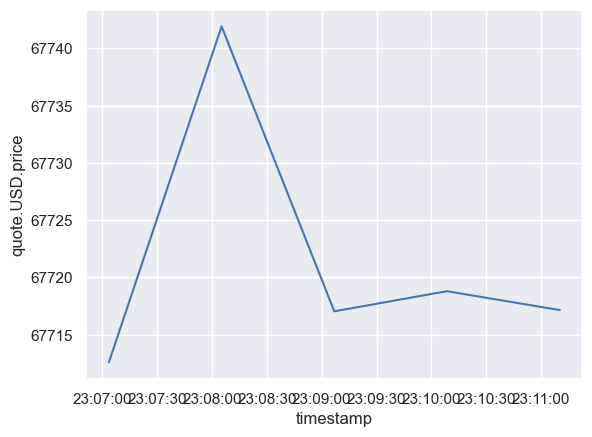

In [42]:
sns.set_theme(style = 'darkgrid')
sns.lineplot(x = 'timestamp', y = 'quote.USD.price', data = df8)